## Loading the Dataset

In [1]:
import pandas as pd

# Construct the file path based on your screenshot
# You may need to adjust the .csv filename if it's different
file_path = '/kaggle/input/python-functions-with-docstrings/python_functions_and_documentation_dataset.csv'

# Load the dataset into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first 5 rows of the DataFrame
print(df.head())

                        repo                              path  \
0  ageitgey/face_recognition  examples/face_recognition_knn.py   
1  ageitgey/face_recognition  examples/face_recognition_knn.py   
2  ageitgey/face_recognition  examples/face_recognition_knn.py   
3  ageitgey/face_recognition           face_recognition/api.py   
4  ageitgey/face_recognition           face_recognition/api.py   

                         func_name  \
0                            train   
1                          predict   
2  show_prediction_labels_on_image   
3                     _rect_to_css   
4              _trim_css_to_bounds   

                                     original_string language  \
0  def train(train_dir, model_save_path=None, n_n...   python   
1  def predict(X_img_path, knn_clf=None, model_pa...   python   
2  def show_prediction_labels_on_image(img_path, ...   python   
3  def _rect_to_css(rect):\n    """\n    Convert ...   python   
4  def _trim_css_to_bounds(css, image_shape):\n  

## Data Visulization Part:

In [2]:
# Check shape, columns, and missing values
print("Shape of dataset:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nMissing values per column:")
print(df.isnull().sum())

# Quick info summary
print("\nData Types:")
print(df.dtypes)

# Unique counts for categorical columns
print("\nUnique counts in categorical columns:")
print(df.nunique())


Shape of dataset: (455243, 13)

Column Names: ['repo', 'path', 'func_name', 'original_string', 'language', 'code', 'code_tokens', 'docstring', 'docstring_tokens', 'sha', 'url', 'partition', 'summary']

Missing values per column:
repo                0
path                0
func_name           2
original_string     0
language            0
code                0
code_tokens         0
docstring           0
docstring_tokens    0
sha                 0
url                 0
partition           0
summary             0
dtype: int64

Data Types:
repo                object
path                object
func_name           object
original_string     object
language            object
code                object
code_tokens         object
docstring           object
docstring_tokens    object
sha                 object
url                 object
partition           object
summary             object
dtype: object

Unique counts in categorical columns:
repo                 13581
path                 92212
f

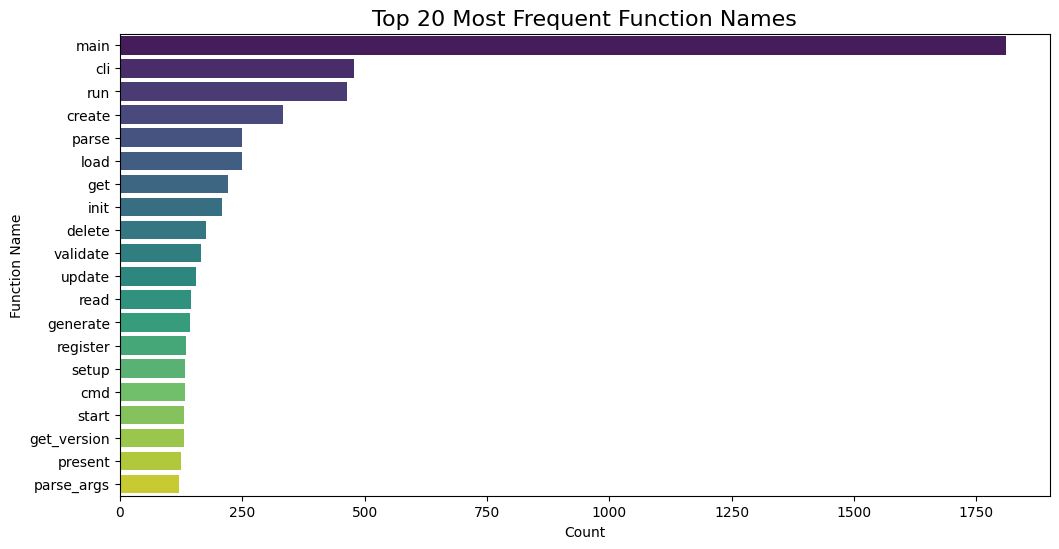

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
top_funcs = df['func_name'].value_counts().head(20)
sns.barplot(x=top_funcs.values, y=top_funcs.index, palette="viridis")

plt.title("Top 20 Most Frequent Function Names", fontsize=16)
plt.xlabel("Count")
plt.ylabel("Function Name")
plt.show()


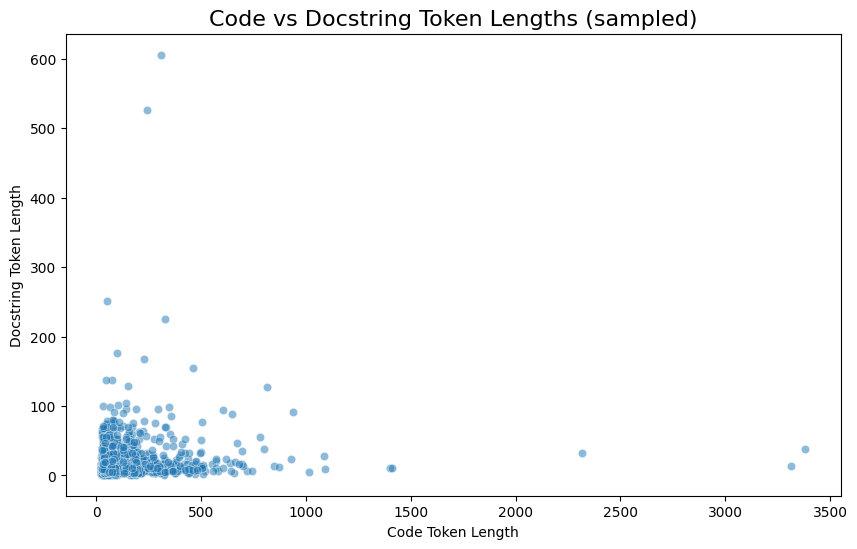

In [4]:
df['code_token_length'] = df['code_tokens'].apply(lambda x: len(eval(x)) if isinstance(x, str) else 0)
df['doc_token_length'] = df['docstring_tokens'].apply(lambda x: len(eval(x)) if isinstance(x, str) else 0)

plt.figure(figsize=(10,6))
sns.scatterplot(data=df.sample(2000), x="code_token_length", y="doc_token_length", alpha=0.5)
plt.title("Code vs Docstring Token Lengths (sampled)", fontsize=16)
plt.xlabel("Code Token Length")
plt.ylabel("Docstring Token Length")
plt.show()


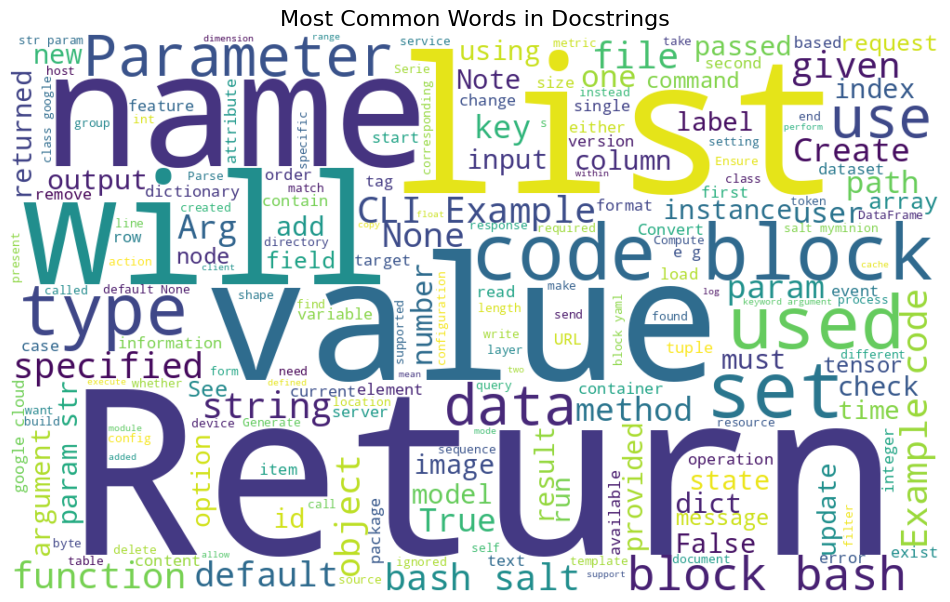

In [5]:
from wordcloud import WordCloud

text = " ".join(df['docstring'].dropna().astype(str).tolist()[:50000])  # sample for performance
wordcloud = WordCloud(width=1000, height=600, background_color="white").generate(text)

plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Docstrings", fontsize=16)
plt.show()


In [6]:
# Create new columns for character lengths
df['code_length'] = df['code'].astype(str).apply(len)
df['docstring_length'] = df['docstring'].astype(str).apply(len)
df['summary_length'] = df['summary'].astype(str).apply(len)
# Store the original number of rows
original_rows = len(df)
print(f"Original dataset shape: {df.shape}")

Original dataset shape: (455243, 18)


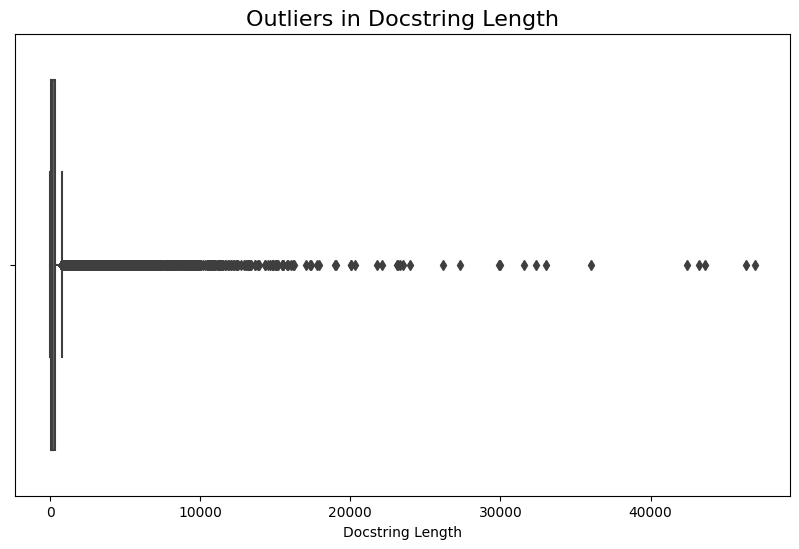

In [7]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['docstring_length'])
plt.title("Outliers in Docstring Length", fontsize=16)
plt.xlabel("Docstring Length")
plt.show()


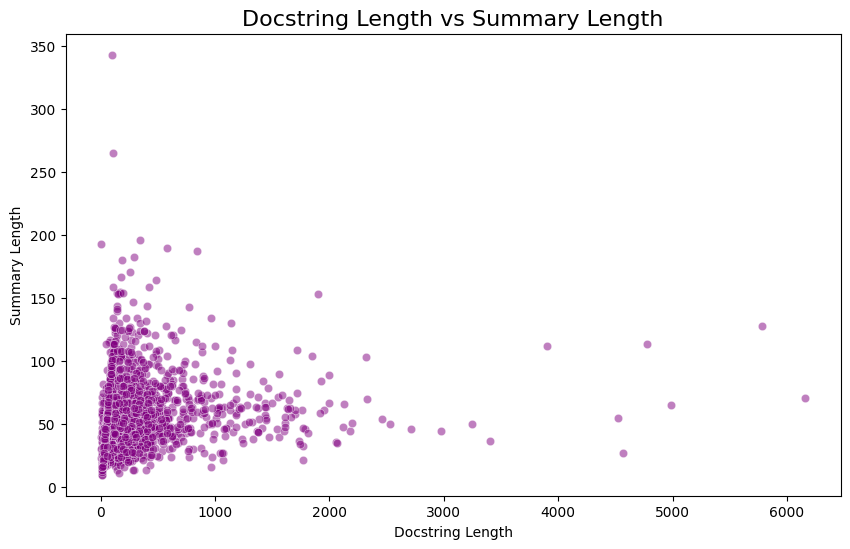

In [8]:
df['summary_length'] = df['summary'].astype(str).apply(len)

plt.figure(figsize=(10,6))
sns.scatterplot(data=df.sample(2000), x="docstring_length", y="summary_length", alpha=0.5, color="purple")
plt.title("Docstring Length vs Summary Length", fontsize=16)
plt.xlabel("Docstring Length")
plt.ylabel("Summary Length")
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


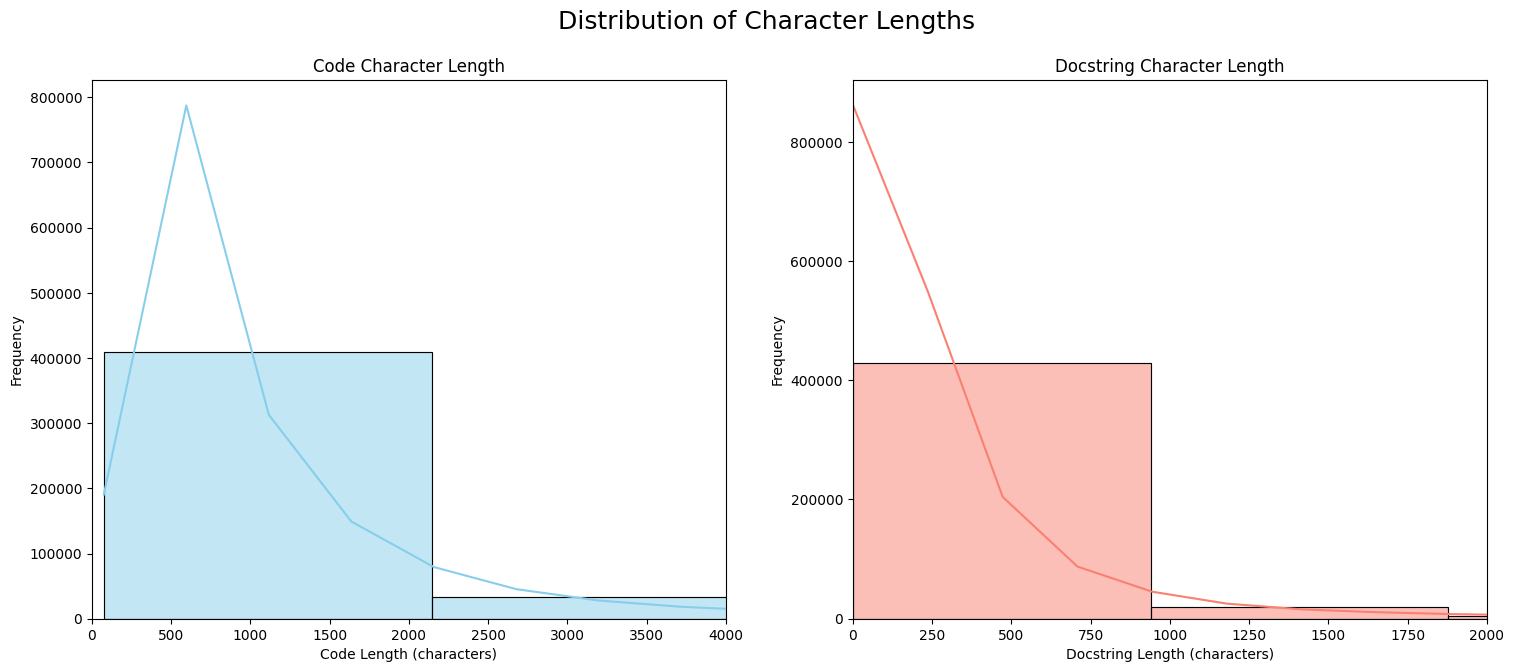

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure for two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Distribution of Character Lengths', fontsize=18)

# Plot for Code Length
sns.histplot(ax=axes[0], data=df, x='code_length', bins=50, kde=True, color='skyblue')
axes[0].set_title('Code Character Length')
axes[0].set_xlabel('Code Length (characters)')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(0, 4000) # Limiting x-axis for better visibility

# Plot for Docstring Length
sns.histplot(ax=axes[1], data=df, x='docstring_length', bins=50, kde=True, color='salmon')
axes[1].set_title('Docstring Character Length')
axes[1].set_xlabel('Docstring Length (characters)')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(0, 2000) # Limiting x-axis for better visibility

plt.show()

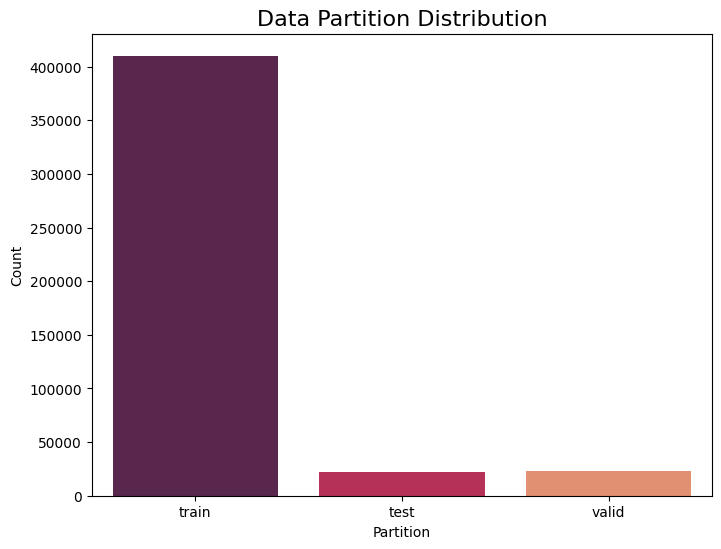

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='partition', palette='rocket')
plt.title('Data Partition Distribution', fontsize=16)
plt.xlabel('Partition')
plt.ylabel('Count')
plt.show()

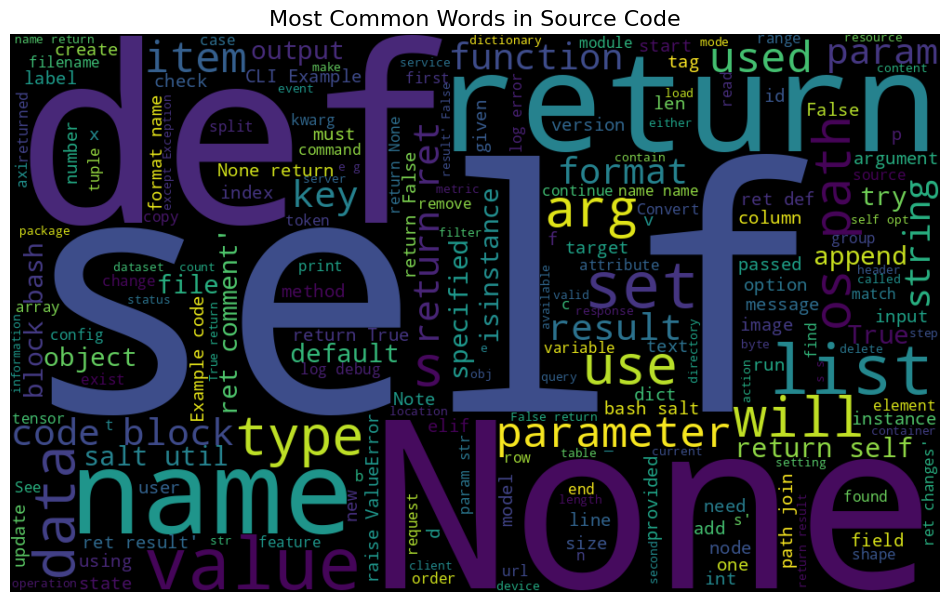

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Using a sample of the data for performance
code_text = " ".join(df['code'].dropna().astype(str).tolist()[:50000])

wordcloud = WordCloud(width=1000, height=600, background_color="black", colormap='viridis').generate(code_text)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Source Code", fontsize=16)
plt.show()

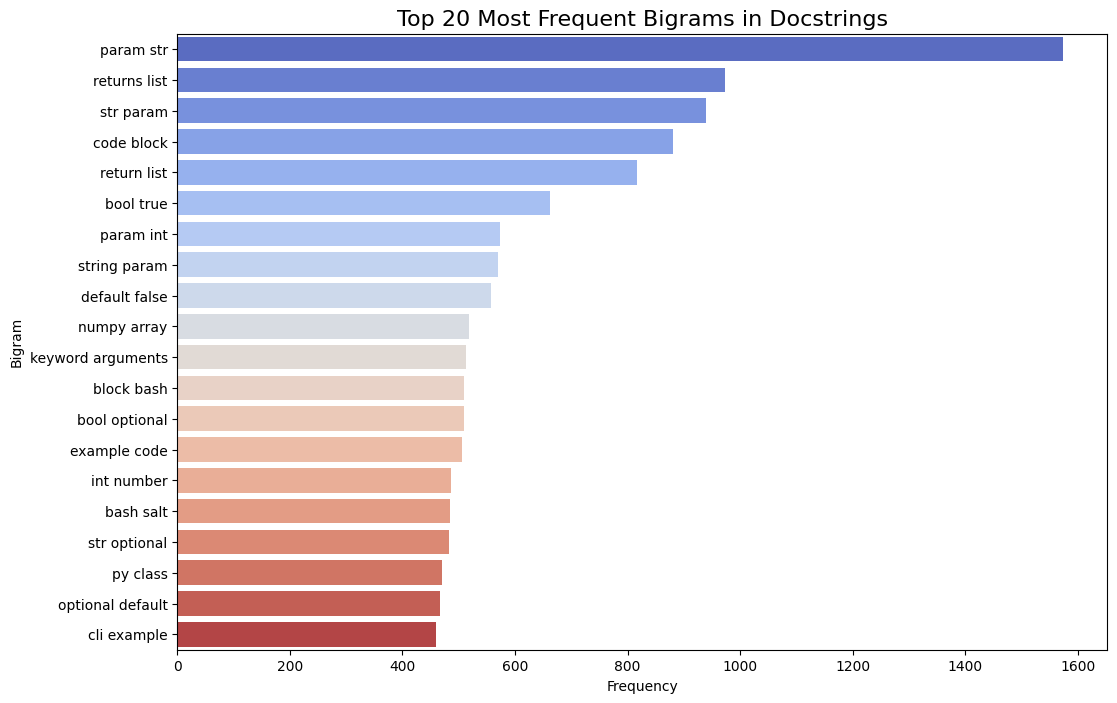

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Using a sample of the data for performance
sample_docstrings = df['docstring'].dropna().astype(str).sample(50000, random_state=42)

# Get top 20 bigrams
vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(sample_docstrings)
bag_of_words = vec.transform(sample_docstrings)
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
top_bigrams = pd.DataFrame(words_freq[:20], columns=['Bigram', 'Frequency'])

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Bigram', data=top_bigrams, palette='coolwarm')
plt.title('Top 20 Most Frequent Bigrams in Docstrings', fontsize=16)
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.show()

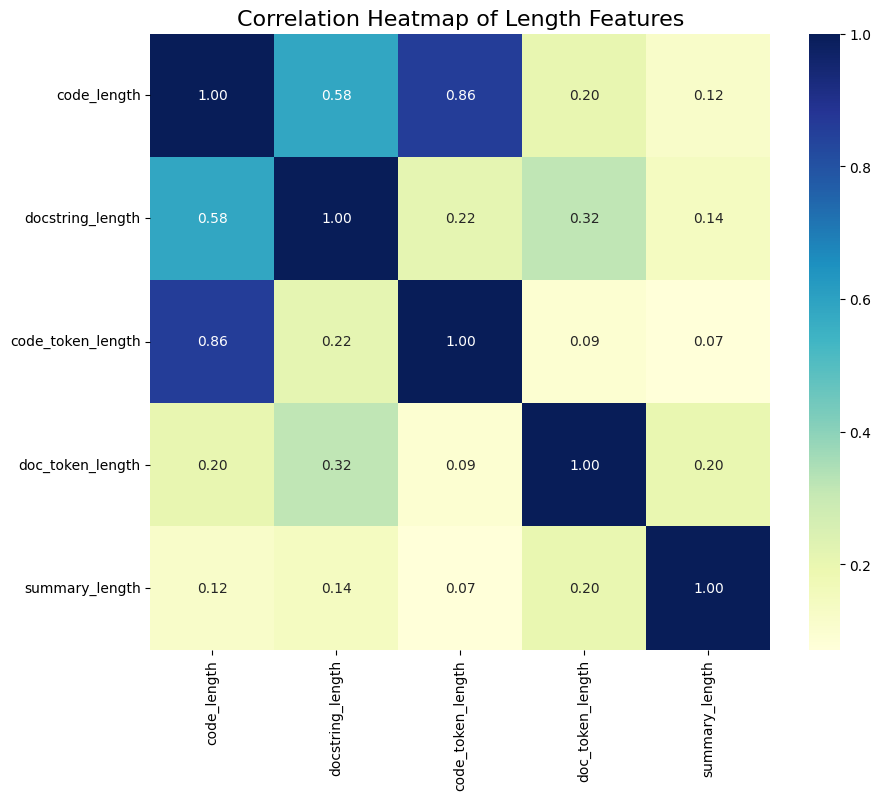

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the numerical length columns for the correlation matrix
length_features = ['code_length', 'docstring_length', 'code_token_length', 'doc_token_length', 'summary_length']
corr_matrix = df[length_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation Heatmap of Length Features', fontsize=16)
plt.show()


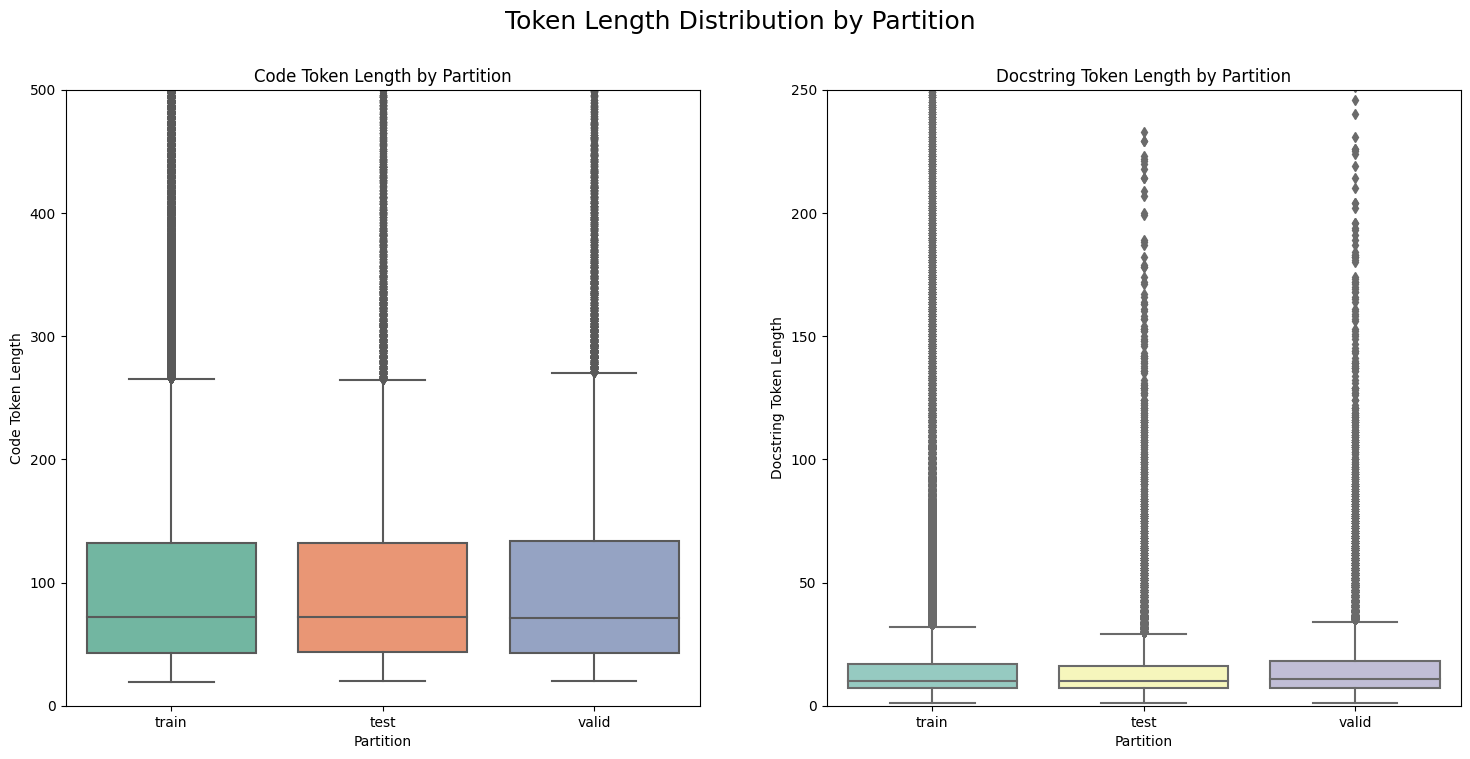

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure for two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Token Length Distribution by Partition', fontsize=18)

# Box plot for Code Token Length
sns.boxplot(ax=axes[0], data=df, x='partition', y='code_token_length', palette='Set2')
axes[0].set_title('Code Token Length by Partition')
axes[0].set_xlabel('Partition')
axes[0].set_ylabel('Code Token Length')
axes[0].set_ylim(0, 500) # Adjust limit to zoom in on the main distribution

# Box plot for Docstring Token Length
sns.boxplot(ax=axes[1], data=df, x='partition', y='doc_token_length', palette='Set3')
axes[1].set_title('Docstring Token Length by Partition')
axes[1].set_xlabel('Partition')
axes[1].set_ylabel('Docstring Token Length')
axes[1].set_ylim(0, 250) # Adjust limit to zoom in on the main distribution

plt.show()

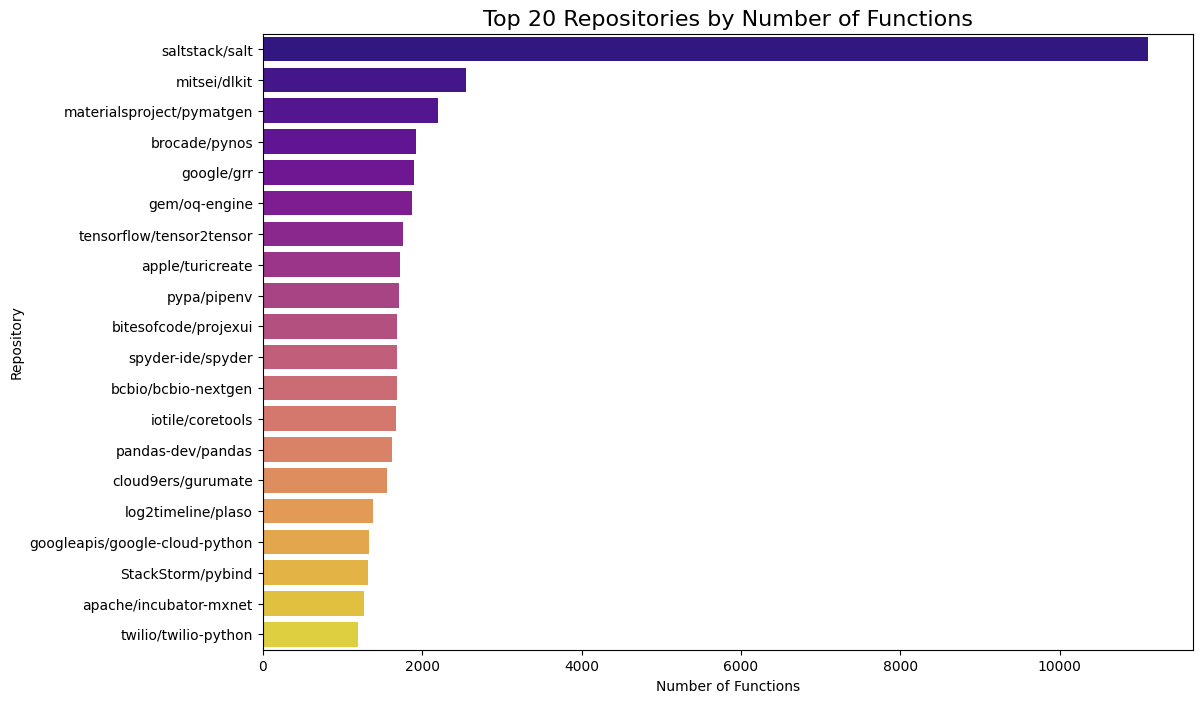

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
top_repos = df['repo'].value_counts().head(20)
sns.barplot(x=top_repos.values, y=top_repos.index, palette='plasma')

plt.title('Top 20 Repositories by Number of Functions', fontsize=16)
plt.xlabel('Number of Functions')
plt.ylabel('Repository')
plt.show()

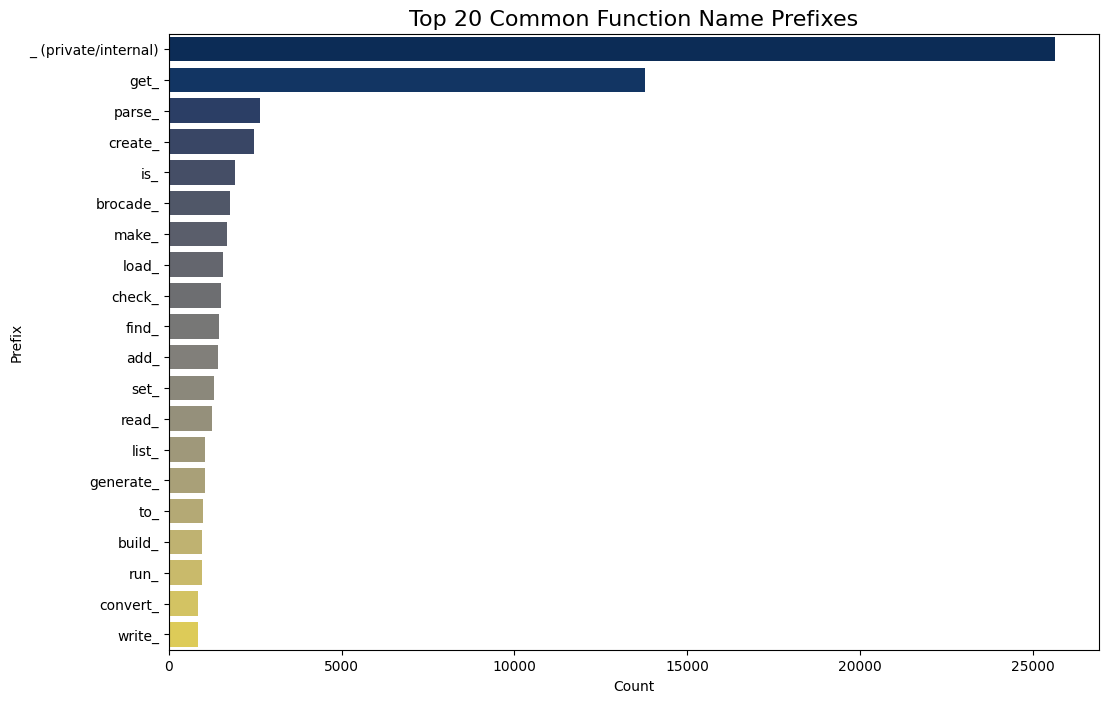

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract prefixes (text before the first underscore)
# We only consider function names that contain an underscore
prefixes = df['func_name'].dropna()
prefixes = prefixes[prefixes.str.contains('_')].apply(lambda x: x.split('_')[0] + '_')
# A common case is functions starting with '_', so let's handle that specifically
prefixes = prefixes.replace({'_': '_ (private/internal)'})


plt.figure(figsize=(12, 8))
top_prefixes = prefixes.value_counts().head(20)
sns.barplot(x=top_prefixes.values, y=top_prefixes.index, palette='cividis')

plt.title('Top 20 Common Function Name Prefixes', fontsize=16)
plt.xlabel('Count')
plt.ylabel('Prefix')
plt.show()

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for function names that start and end with '__'
dunder_methods = df['func_name'].dropna()
dunder_methods = dunder_methods[dunder_methods.str.startswith('__') & dunder_methods.str.endswith('__')]

# --- SOLUTION: ADD THIS CHECK ---
# First, check if the filtered DataFrame is empty
if not dunder_methods.empty:
    plt.figure(figsize=(12, 8))
    top_dunders = dunder_methods.value_counts().head(15)
    sns.barplot(x=top_dunders.values, y=top_dunders.index, palette='cubehelix')

    plt.title('Frequency of Top 15 Special "Dunder" Methods', fontsize=16)
    plt.xlabel('Count')
    plt.ylabel('Dunder Method')
    plt.show()
else:
    # If it's empty, print a message instead of trying to plot
    print("No 'dunder' methods (e.g., __init__) were found in the 'func_name' column.")

No 'dunder' methods (e.g., __init__) were found in the 'func_name' column.


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


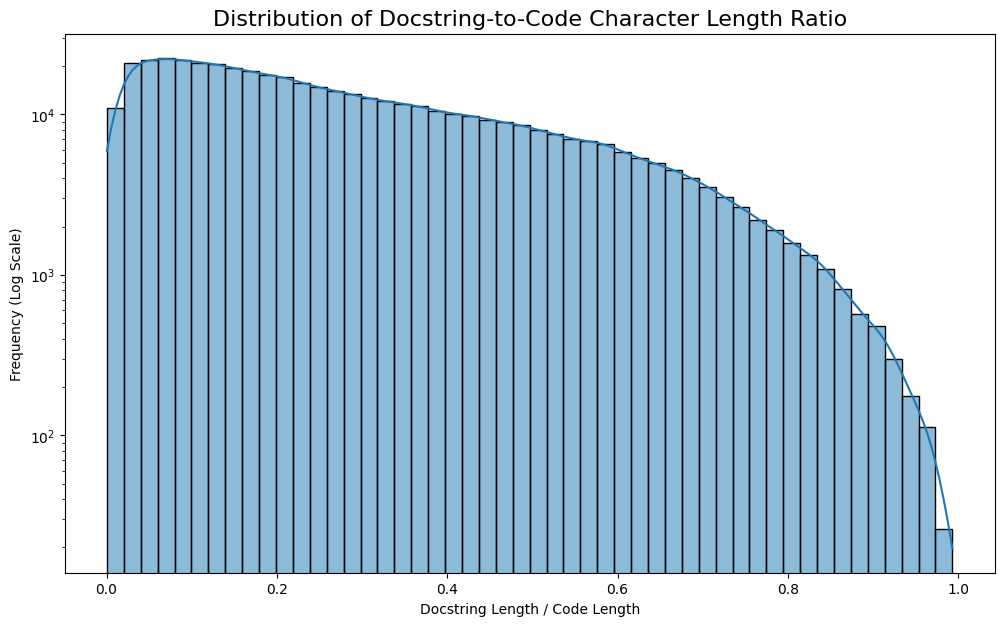

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the ratio, adding 1 to the denominator to avoid division by zero
df['doc_code_ratio'] = df['docstring_length'] / (df['code_length'] + 1)

plt.figure(figsize=(12, 7))
# We use a log scale on the y-axis to see the distribution more clearly
# We also filter out extreme ratios for better visualization
sns.histplot(df[(df['doc_code_ratio'] > 0) & (df['doc_code_ratio'] < 5)]['doc_code_ratio'],
             bins=50, kde=True, log_scale=(False, True))

plt.title('Distribution of Docstring-to-Code Character Length Ratio', fontsize=16)
plt.xlabel('Docstring Length / Code Length')
plt.ylabel('Frequency (Log Scale)')
plt.show()




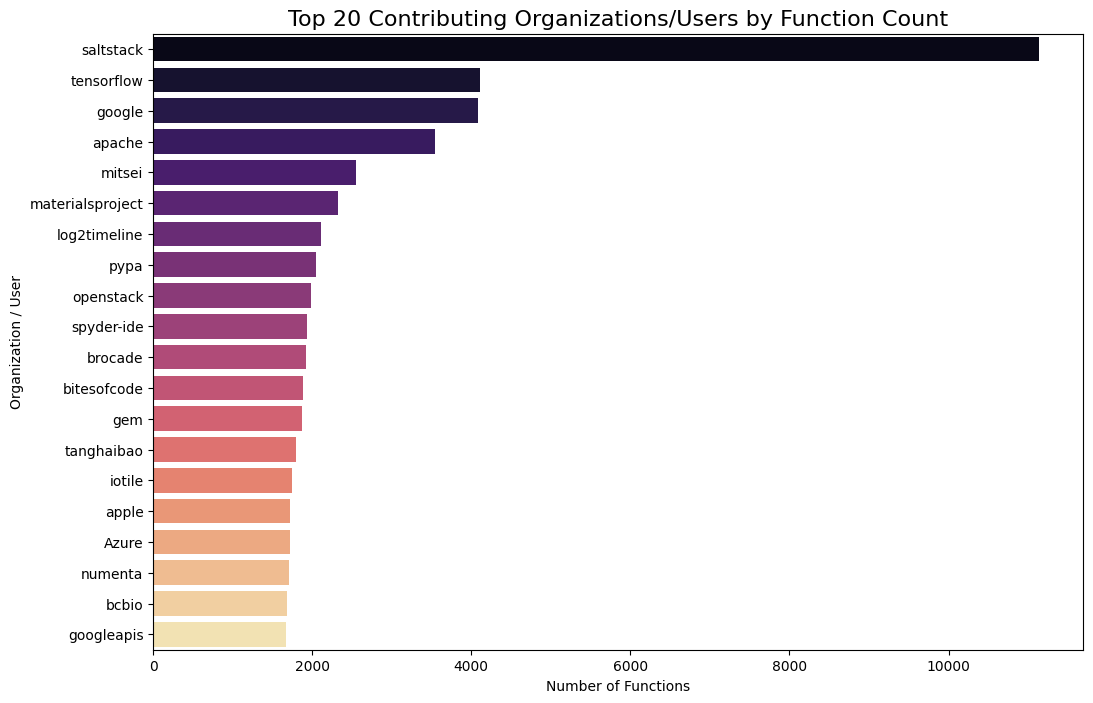

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the owner/organization from the 'repo' column
# This part is correct: it takes everything before the '/'
df['repo_owner'] = df['repo'].apply(lambda x: x.split('/')[0])

plt.figure(figsize=(12, 8))
top_owners = df['repo_owner'].value_counts().head(20)
sns.barplot(x=top_owners.values, y=top_owners.index, palette='magma')

# The main change is in the title and labels for clarity
plt.title('Top 20 Contributing Organizations/Users by Function Count', fontsize=16)
plt.xlabel('Number of Functions')
plt.ylabel('Organization / User')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


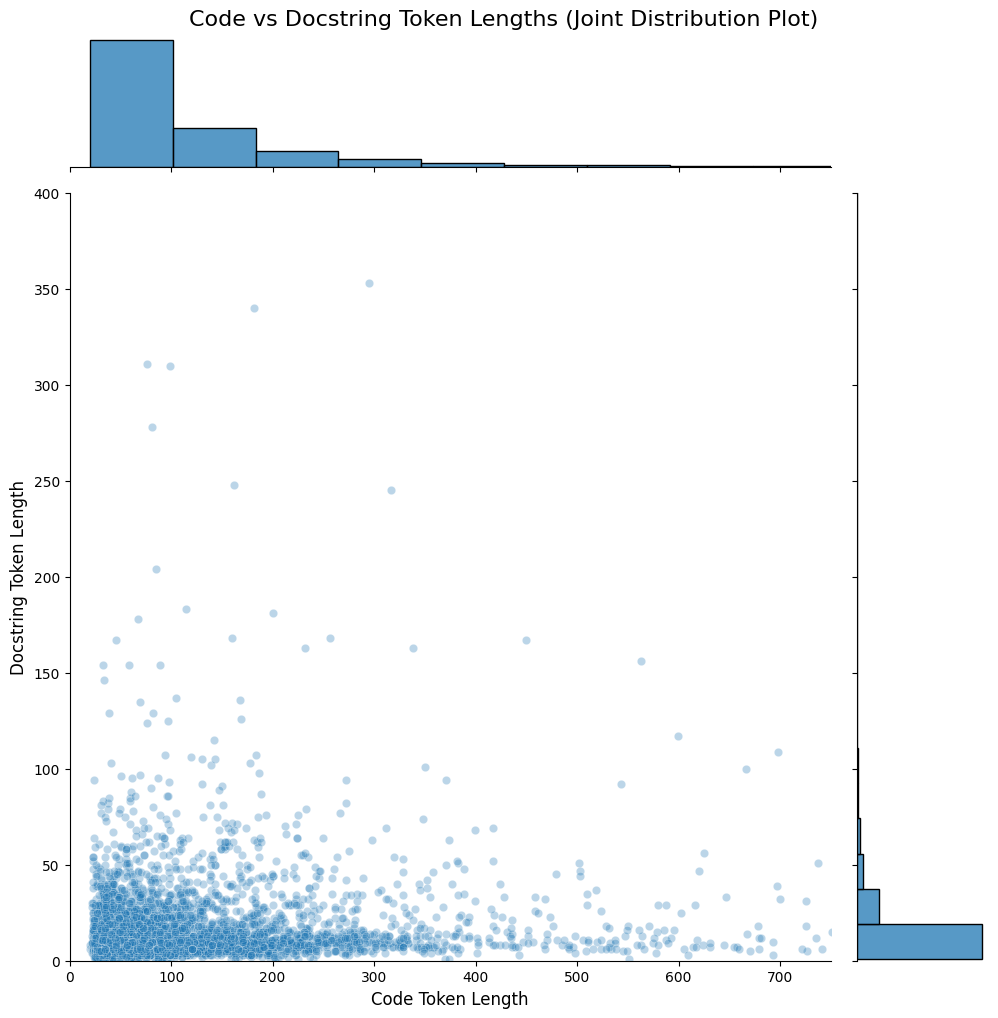

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use a smaller sample for performance, as jointplots can be slow
df_sample = df.sample(5000, random_state=42)

# Create the joint plot
g = sns.jointplot(
    data=df_sample,
    x="code_token_length",
    y="doc_token_length",
    kind="scatter",
    alpha=0.3,
    height=10,
    marginal_kws=dict(bins=50, fill=True)
)

g.fig.suptitle("Code vs Docstring Token Lengths (Joint Distribution Plot)", y=1.01, fontsize=16)
g.set_axis_labels("Code Token Length", "Docstring Token Length", fontsize=12)

# Set limits to zoom in on the densest area
plt.xlim(0, 750)
plt.ylim(0, 400)
plt.show()

## Data Cleaning

In [21]:
# --- STEP 1: Handle Missing Values ---
df.dropna(subset=['func_name'], inplace=True)

print(f"Rows removed: {original_rows - len(df)}")
print(f"Current dataset shape: {df.shape}")


Rows removed: 2
Current dataset shape: (455241, 20)


In [22]:
# --- STEP 2: Remove Duplicates ---
rows_before_deduplication = len(df)
df.drop_duplicates(subset=['code', 'docstring', 'summary'], inplace=True)

print(f"Rows removed: {rows_before_deduplication - len(df)}")
print(f"Current dataset shape: {df.shape}")

Rows removed: 0
Current dataset shape: (455241, 20)


In [23]:
# --- STEP 3: Remove Length-based Outliers ---
rows_before_outlier_removal = len(df)

# Define the lower and upper bounds using quantiles
lower_bound_code = df['code_length'].quantile(0.01)
upper_bound_code = df['code_length'].quantile(0.99)
lower_bound_doc = df['docstring_length'].quantile(0.01)
upper_bound_doc = df['docstring_length'].quantile(0.99)

print(f"Code length will be filtered between: {lower_bound_code:.0f} and {upper_bound_code:.0f} characters.")
print(f"Docstring length will be filtered between: {lower_bound_doc:.0f} and {upper_bound_doc:.0f} characters.")

# Apply the filter
df = df[(df['code_length'] >= lower_bound_code) & (df['code_length'] <= upper_bound_code)]
df = df[(df['docstring_length'] >= lower_bound_doc) & (df['docstring_length'] <= upper_bound_doc)]

print(f"\nRows removed: {rows_before_outlier_removal - len(df)}")
print(f"Current dataset shape: {df.shape}")

Code length will be filtered between: 162 and 6359 characters.
Docstring length will be filtered between: 14 and 2292 characters.

Rows removed: 15527
Current dataset shape: (439714, 20)


In [24]:
# --- STEP 4: Remove Trivially Short Docstrings ---
# A docstring with fewer than 3 words is unlikely to be a good summary.
# First, let's ensure the docstring_tokens column is in the correct list format
import ast
df['docstring_tokens_len'] = df['docstring_tokens'].apply(lambda x: len(ast.literal_eval(x)))

rows_before_short_removal = len(df)

# Filter out rows where the docstring has fewer than 3 tokens
df = df[df['docstring_tokens_len'] >= 3]

print(f"Rows removed: {rows_before_short_removal - len(df)}")
print(f"Current dataset shape: {df.shape}")

Rows removed: 4630
Current dataset shape: (435084, 21)


In [25]:
# --- FINAL REPORT ---
final_rows = len(df)
rows_removed = original_rows - final_rows
percentage_removed = (rows_removed / original_rows) * 100

print(f"Original number of rows: {original_rows}")
print(f"Final number of rows after cleaning: {final_rows}")
print(f"Total rows removed: {rows_removed}")
print(f"Percentage of data removed: {percentage_removed:.2f}%")

# Display the first 5 rows of the cleaned DataFrame
print("\nPreview of the cleaned dataset:")
print(df.head())

Original number of rows: 455243
Final number of rows after cleaning: 435084
Total rows removed: 20159
Percentage of data removed: 4.43%

Preview of the cleaned dataset:
                        repo                              path  \
0  ageitgey/face_recognition  examples/face_recognition_knn.py   
1  ageitgey/face_recognition  examples/face_recognition_knn.py   
2  ageitgey/face_recognition  examples/face_recognition_knn.py   
3  ageitgey/face_recognition           face_recognition/api.py   
4  ageitgey/face_recognition           face_recognition/api.py   

                         func_name  \
0                            train   
1                          predict   
2  show_prediction_labels_on_image   
3                     _rect_to_css   
4              _trim_css_to_bounds   

                                     original_string language  \
0  def train(train_dir, model_save_path=None, n_n...   python   
1  def predict(X_img_path, knn_clf=None, model_pa...   python   
2  def sho

In [26]:
# --- Define the list of columns you want to remove ---
columns_to_remove = ['url', 'sha', 'language']

# --- Find which of these columns actually exist in the DataFrame ---
# This is a safety check to prevent errors if a column has already been removed
# or never existed (like 'ssh' in this case).
existing_columns = [col for col in columns_to_remove if col in df.columns]

# --- Drop the columns that were found ---
if existing_columns:
    df.drop(columns=existing_columns, inplace=True)
    print("Successfully removed the following columns:")
    for col in existing_columns:
        print(f"- {col}")
else:
    print("No columns from your list were found in the DataFrame.")

# --- Verify the result by showing the current list of columns ---
print("\nRemaining columns in the DataFrame:")
print(df.columns.tolist())

Successfully removed the following columns:
- url
- sha
- language

Remaining columns in the DataFrame:
['repo', 'path', 'func_name', 'original_string', 'code', 'code_tokens', 'docstring', 'docstring_tokens', 'partition', 'summary', 'code_token_length', 'doc_token_length', 'code_length', 'docstring_length', 'summary_length', 'doc_code_ratio', 'repo_owner', 'docstring_tokens_len']


## Faster tokenization

In [27]:
# bpe_tokenizer_resumable.py
# Resumable & faster BPE tokenizer implementation.
# - Faster pair counting using Counters and tuple-based words
# - Checkpointing (periodic save to disk) so training can resume after interruption
# - Save vocab/merges in formats compatible with original code's save/load
# - Three example training runs (code-only, docs-only, combined) similar to your original cells

import re
import collections
import json
import time
import pickle
import os
import signal
from tqdm.auto import tqdm
from typing import List, Dict, Tuple

# -------------------------------
# Utilities
# -------------------------------

def default_tokenize(text: str) -> List[str]:
    # tokenizes into words/punctuation similar to your original regex
    return re.findall(r"\w+|\S", text)

# -------------------------------
# BPE Tokenizer (resumable)
# -------------------------------
class ResumableBPE:
    def __init__(self):
        self.vocab: List[str] = []
        self.merges: Dict[Tuple[str,str], int] = {}
        self.token_to_id: Dict[str,int] = {}
        self.id_to_token: Dict[int,str] = {}
        self.vocab_size: int = 0
        # internal training state
        self._word_freqs: Dict[Tuple[str,...], int] = {}
        self._pair_counts: collections.Counter = collections.Counter()
        self._occurrences: Dict[Tuple[str,str], Dict[Tuple[str,...], List[int]]] = {}
        # checkpointing
        self._stop_requested = False

    # -------------------------------
    # Saving / Loading
    # -------------------------------
    def save(self, file_prefix: str):
        vocab_path = f"{file_prefix}_vocab.json"
        merges_path = f"{file_prefix}_merges.json"
        state_path = f"{file_prefix}_state.pkl"

        with open(vocab_path, 'w', encoding='utf-8') as f:
            json.dump(self.token_to_id, f, ensure_ascii=False, indent=2)

        merges_to_save = {' '.join(k): v for k, v in self.merges.items()}
        with open(merges_path, 'w', encoding='utf-8') as f:
            json.dump(merges_to_save, f, ensure_ascii=False, indent=2)

        # Save internal state for resuming
        with open(state_path, 'wb') as f:
            pickle.dump({
                'word_freqs': self._word_freqs,
                'pair_counts': self._pair_counts,
                'occurrences': self._occurrences,
                'vocab': self.vocab,
                'merges': self.merges,
                'vocab_size': self.vocab_size
            }, f)

        print(f"Saved vocab -> {vocab_path}, merges -> {merges_path}, state -> {state_path}")

    def load(self, file_prefix: str):
        vocab_path = f"{file_prefix}_vocab.json"
        merges_path = f"{file_prefix}_merges.json"
        state_path = f"{file_prefix}_state.pkl"

        with open(vocab_path, 'r', encoding='utf-8') as f:
            self.token_to_id = json.load(f)
        self.vocab = [None] * len(self.token_to_id)
        for tok, idx in self.token_to_id.items():
            self.vocab[idx] = tok
        self.id_to_token = {i: t for t, i in self.token_to_id.items()}
        self.vocab_size = len(self.vocab)

        with open(merges_path, 'r', encoding='utf-8') as f:
            merges_loaded = json.load(f)
        self.merges = {tuple(k.split(' ')): v for k, v in merges_loaded.items()}

        if os.path.exists(state_path):
            with open(state_path, 'rb') as f:
                st = pickle.load(f)
            self._word_freqs = st.get('word_freqs', {})
            self._pair_counts = st.get('pair_counts', collections.Counter())
            self._occurrences = st.get('occurrences', {})
            # vocab and merges already set above
        print(f"Loaded tokenizer from {file_prefix}. Vocab size: {self.vocab_size}")

    # -------------------------------
    # Internal helpers
    # -------------------------------
    def _initialize_from_corpus(self, texts: List[str], special_tokens: List[str]):
        # build char-level vocab + word frequency map where words are tuples of chars + </w>
        char_set = set()
        word_freqs: Dict[Tuple[str,...], int] = {}
        for text in texts:
            for word in default_tokenize(text):
                chars = tuple(list(word) + ['</w>'])
                word_freqs[chars] = word_freqs.get(chars, 0) + 1
                char_set.update(chars)

        # initial vocab: special tokens + sorted chars
        self.vocab = special_tokens + sorted(list(char_set))
        self._word_freqs = word_freqs

        # build initial pair counts and occurrences map for efficient updates
        pair_counts = collections.Counter()
        occurrences = {}
        for word, freq in word_freqs.items():
            symbols = list(word)
            for i in range(len(symbols)-1):
                pair = (symbols[i], symbols[i+1])
                pair_counts[pair] += freq
                # record occurrence: map pair -> word -> list of indices
                occ = occurrences.setdefault(pair, {})
                occ.setdefault(word, []).append(i)

        self._pair_counts = pair_counts
        self._occurrences = occurrences
        self._invert_vocab()

    def _invert_vocab(self):
        self.token_to_id = {token: i for i, token in enumerate(self.vocab)}
        self.id_to_token = {i: token for i, token in enumerate(self.vocab)}
        self.vocab_size = len(self.vocab)

    # -------------------------------
    # Core training loop (resumable)
    # -------------------------------
    def train(self,
              texts: List[str],
              target_vocab_size: int,
              special_tokens: List[str]=None,
              checkpoint_prefix: str='bpe_checkpoint',
              checkpoint_interval: int=100,
              checkpoint_seconds: int=300,
              resume: bool=False):
        """
        Train BPE with resumable checkpoints.
        - checkpoint_interval: save every N merges
        - checkpoint_seconds: also save if time since last save > this
        - resume: if True, will try to load checkpoint files with given prefix
        """
        if special_tokens is None:
            special_tokens = []

        # if resume and checkpoint exists, try to load
        state_path = f"{checkpoint_prefix}_state.pkl"
        if resume and os.path.exists(state_path):
            print("Resuming from checkpoint...")
            self.load(checkpoint_prefix)
            # compute remaining merges
            num_merges_done = len(self.merges)
            merges_to_do = target_vocab_size - self.vocab_size
        else:
            print("Initializing from corpus...")
            self._initialize_from_corpus(texts, special_tokens)
            self.merges = {}
            num_merges_done = 0
            merges_to_do = target_vocab_size - self.vocab_size

        if merges_to_do <= 0:
            print("Requested vocab size already satisfied. Nothing to do.")
            return

        last_checkpoint_time = time.time()
        start_time = time.time()
        pbar = tqdm(range(num_merges_done, num_merges_done + merges_to_do), desc='Merges')

        try:
            for merge_index in pbar:
                if not self._pair_counts:
                    print("No more pairs to merge.")
                    break
                # pick best pair (highest count)
                best_pair, best_count = self._pair_counts.most_common(1)[0]
                # apply merge
                new_symbol = ''.join(best_pair)
                # record merge with increasing integer rank
                self.merges[best_pair] = merge_index
                self.vocab.append(new_symbol)
                # update word_freqs, pair_counts, occurrences
                self._apply_merge(best_pair, new_symbol)
                # update progress bar
                if (merge_index + 1) % 10 == 0:
                    pbar.set_postfix({"latest_merge": f"{best_pair} -> {new_symbol}",
                                      "vocab_size": len(self.vocab)})

                # Checkpoint by interval
                now = time.time()
                if ((merge_index + 1) % checkpoint_interval == 0) or (now - last_checkpoint_time > checkpoint_seconds):
                    self._checkpoint(checkpoint_prefix)
                    last_checkpoint_time = now
                if self._stop_requested:
                    print("Stop requested: checkpointing and exiting training loop.")
                    self._checkpoint(checkpoint_prefix)
                    break

        except Exception as e:
            print(f"Exception during training: {e}\nSaving checkpoint before raising.")
            self._checkpoint(checkpoint_prefix)
            raise

        end_time = time.time()
        print(f"Training finished. Time elapsed: {(end_time - start_time)/60:.2f} minutes")
        # final checkpoint
        self._checkpoint(checkpoint_prefix)
        self._invert_vocab()

    def _apply_merge(self, pair: Tuple[str,str], new_symbol: str):
        """Replace pair occurrences in self._word_freqs and update pair counts and occurrences efficiently."""
        pair_occ = self._occurrences.get(pair, {})
        if not pair_occ:
            # nothing to do
            # remove pair from counts if present
            self._pair_counts.pop(pair, None)
            return

        new_occurrences_updates = {}
        new_pair_counts = collections.Counter()

        # For each word where pair occurs, produce the merged word and update counts
        for word, indices in pair_occ.items():
            freq = self._word_freqs.pop(word, 0)
            if freq == 0:
                continue
            symbols = list(word)
            # create merged symbols list by merging all non-overlapping occurrences
            i = 0
            merged_symbols = []
            while i < len(symbols):
                if i < len(symbols) -1 and (symbols[i], symbols[i+1]) == pair:
                    merged_symbols.append(new_symbol)
                    i += 2
                else:
                    merged_symbols.append(symbols[i])
                    i += 1
            new_word = tuple(merged_symbols)
            # update word_freqs
            self._word_freqs[new_word] = self._word_freqs.get(new_word, 0) + freq

            # update pair counts and occurrences for the new word
            for j in range(len(merged_symbols)-1):
                p = (merged_symbols[j], merged_symbols[j+1])
                new_pair_counts[p] += freq
                occ_map = new_occurrences_updates.setdefault(p, {})
                occ_map.setdefault(new_word, []).append(j)

        # Remove old pair entirely
        self._pair_counts.pop(pair, None)
        self._occurrences.pop(pair, None)

        # Now rebuild pair counts: subtract contributions of words we modified
        # Easiest approach: recompute pair_counts from scratch from occurrences mapping
        # But we can update incrementally: remove contributions of old words (already removed above)
        # and add new_pair_counts

        # Remove contributions of modified words from existing counts
        # Note: pair_occ keys were removed from _word_freqs already so old contributions should not exist
        # Add new pair counts
        self._pair_counts.update(new_pair_counts)

        # Update occurrences map: remove any word references for pairs that no longer exist
        # and add new occurrences
        for p, occs in new_occurrences_updates.items():
            occ_map = self._occurrences.setdefault(p, {})
            for w, idxs in occs.items():
                occ_map.setdefault(w, []).extend(idxs)

        # There may be leftover occurrences referencing removed words; that's okay — they won't be used
        # as we always consult self._word_freqs when applying merges

    def _checkpoint(self, prefix: str):
        try:
            # prepare token_to_id and save
            self._invert_vocab()
            self.save(prefix)
        except Exception as e:
            print(f"Failed to checkpoint: {e}")

    def request_stop(self):
        self._stop_requested = True

    # -------------------------------
    # Encoding / Decoding
    # -------------------------------
    def _get_word_tokens(self, word: str) -> List[str]:
        # greedy merge using learned merges ordered by their assigned rank
        tokens = list(word) + ['</w>']
        merges_rank = self.merges
        # keep merging while any pair exists in merges
        while True:
            pairs = [(tokens[i], tokens[i+1]) for i in range(len(tokens)-1)]
            candidates = [(p, merges_rank[p]) for p in pairs if p in merges_rank]
            if not candidates:
                break
            # pick the pair with smallest rank (earlier merge)
            best_pair, _ = min(candidates, key=lambda x: x[1])
            # merge first occurrence of that pair
            idx = pairs.index(best_pair)
            tokens = tokens[:idx] + ["".join(best_pair)] + tokens[idx+2:]
        return tokens

    def encode(self, text: str) -> List[int]:
        ids = []
        for word in default_tokenize(text):
            for tok in self._get_word_tokens(word):
                ids.append(self.token_to_id.get(tok, self.token_to_id.get('<UNK>', 0)))
        return ids

    def decode(self, token_ids: List[int]) -> str:
        toks = [self.id_to_token.get(i, '<UNK>') for i in token_ids]
        text = ''.join(toks).replace('</w>', ' ')
        return text

# -------------------------------
# Signal handlers to allow graceful stop
# -------------------------------
def install_signal_handlers(bpe: ResumableBPE):
    def handler(signum, frame):
        print(f"Signal {signum} received. Requesting graceful stop...")
        bpe.request_stop()
    signal.signal(signal.SIGINT, handler)
    signal.signal(signal.SIGTERM, handler)

# -------------------------------
# Example training usage (three tasks) - adapt to your DataFrame variable `df`
# -------------------------------

if __name__ == '__main__':
    # Example parameters --- change to suit your environment
    DEV_VOCAB_SIZE = 32000
    DEV_CORPUS_SAMPLE_SIZE = 50000
    SPECIAL_TOKENS = ['<PAD>', '<UNK>', '<SOS>', '<EOS>']

    # Assume you have a pandas DataFrame `df` with 'code' and 'docstring' columns
    import pandas as pd
    # Replace this with your actual df loading if running stand-alone
    # df = pd.read_csv('your_dataset.csv')

    # For demonstration we'll check df exists
    if 'df' not in globals():
        print('Warning: df not found in globals. This module expects `df` to be provided by the caller.')

    # Helper to run a task with checkpointing
    def run_task(texts, file_prefix):
        bpe = ResumableBPE()
        install_signal_handlers(bpe)
        # If there's an existing checkpoint, pass resume=True to continue
        resume = os.path.exists(f"{file_prefix}_state.pkl")
        bpe.train(texts=texts,
                  target_vocab_size=DEV_VOCAB_SIZE,
                  special_tokens=SPECIAL_TOKENS,
                  checkpoint_prefix=file_prefix,
                  checkpoint_interval=200,
                  checkpoint_seconds=300,
                  resume=resume)

    # TASK 1: CODE-ONLY
    if 'df' in globals():
        print('\n' + '='*80)
        print('--- Starting DEV Training for CODE-ONLY Tokenizer ---')
        print('='*80)
        code_corpus_sample = df['code'].sample(min(len(df), DEV_CORPUS_SAMPLE_SIZE), random_state=42).tolist()
        run_task(code_corpus_sample, 'bpe_code_only_tokenizer_dev')

        # TASK 2: DOCS-ONLY
        print('\n' + '='*80)
        print('--- Starting DEV Training for DOCS-ONLY Tokenizer ---')
        print('='*80)
        docs_corpus_sample = df['docstring'].sample(min(len(df), DEV_CORPUS_SAMPLE_SIZE), random_state=42).tolist()
        run_task(docs_corpus_sample, 'bpe_docs_only_tokenizer_dev')

        # TASK 3: COMBINED
        print('\n' + '='*80)
        print('--- Starting DEV Training for COMBINED Tokenizer ---')
        print('='*80)
        combined_corpus_sample = df['code'].sample(DEV_CORPUS_SAMPLE_SIZE // 2, random_state=42).tolist() + \
                                 df['docstring'].sample(DEV_CORPUS_SAMPLE_SIZE // 2, random_state=42).tolist()
        run_task(combined_corpus_sample, 'bpe_combined_tokenizer_dev')

        print('\n' + '='*80)
        print('--- ALL THREE TOKENIZERS COMPLETED (OR WERE RESUMED/STOPPED SAFELY) ---')
        print('='*80)



--- Starting DEV Training for CODE-ONLY Tokenizer ---
Initializing from corpus...


Merges:   0%|          | 0/30482 [00:00<?, ?it/s]

Saved vocab -> bpe_code_only_tokenizer_dev_vocab.json, merges -> bpe_code_only_tokenizer_dev_merges.json, state -> bpe_code_only_tokenizer_dev_state.pkl
Saved vocab -> bpe_code_only_tokenizer_dev_vocab.json, merges -> bpe_code_only_tokenizer_dev_merges.json, state -> bpe_code_only_tokenizer_dev_state.pkl
Saved vocab -> bpe_code_only_tokenizer_dev_vocab.json, merges -> bpe_code_only_tokenizer_dev_merges.json, state -> bpe_code_only_tokenizer_dev_state.pkl
Saved vocab -> bpe_code_only_tokenizer_dev_vocab.json, merges -> bpe_code_only_tokenizer_dev_merges.json, state -> bpe_code_only_tokenizer_dev_state.pkl
Saved vocab -> bpe_code_only_tokenizer_dev_vocab.json, merges -> bpe_code_only_tokenizer_dev_merges.json, state -> bpe_code_only_tokenizer_dev_state.pkl
Saved vocab -> bpe_code_only_tokenizer_dev_vocab.json, merges -> bpe_code_only_tokenizer_dev_merges.json, state -> bpe_code_only_tokenizer_dev_state.pkl
Saved vocab -> bpe_code_only_tokenizer_dev_vocab.json, merges -> bpe_code_only_tok

Merges:   0%|          | 0/30728 [00:00<?, ?it/s]

Saved vocab -> bpe_docs_only_tokenizer_dev_vocab.json, merges -> bpe_docs_only_tokenizer_dev_merges.json, state -> bpe_docs_only_tokenizer_dev_state.pkl
Saved vocab -> bpe_docs_only_tokenizer_dev_vocab.json, merges -> bpe_docs_only_tokenizer_dev_merges.json, state -> bpe_docs_only_tokenizer_dev_state.pkl
Saved vocab -> bpe_docs_only_tokenizer_dev_vocab.json, merges -> bpe_docs_only_tokenizer_dev_merges.json, state -> bpe_docs_only_tokenizer_dev_state.pkl
Saved vocab -> bpe_docs_only_tokenizer_dev_vocab.json, merges -> bpe_docs_only_tokenizer_dev_merges.json, state -> bpe_docs_only_tokenizer_dev_state.pkl
Saved vocab -> bpe_docs_only_tokenizer_dev_vocab.json, merges -> bpe_docs_only_tokenizer_dev_merges.json, state -> bpe_docs_only_tokenizer_dev_state.pkl
Saved vocab -> bpe_docs_only_tokenizer_dev_vocab.json, merges -> bpe_docs_only_tokenizer_dev_merges.json, state -> bpe_docs_only_tokenizer_dev_state.pkl
Saved vocab -> bpe_docs_only_tokenizer_dev_vocab.json, merges -> bpe_docs_only_tok

Merges:   0%|          | 0/30853 [00:00<?, ?it/s]

Saved vocab -> bpe_combined_tokenizer_dev_vocab.json, merges -> bpe_combined_tokenizer_dev_merges.json, state -> bpe_combined_tokenizer_dev_state.pkl
Saved vocab -> bpe_combined_tokenizer_dev_vocab.json, merges -> bpe_combined_tokenizer_dev_merges.json, state -> bpe_combined_tokenizer_dev_state.pkl
Saved vocab -> bpe_combined_tokenizer_dev_vocab.json, merges -> bpe_combined_tokenizer_dev_merges.json, state -> bpe_combined_tokenizer_dev_state.pkl
Saved vocab -> bpe_combined_tokenizer_dev_vocab.json, merges -> bpe_combined_tokenizer_dev_merges.json, state -> bpe_combined_tokenizer_dev_state.pkl
Saved vocab -> bpe_combined_tokenizer_dev_vocab.json, merges -> bpe_combined_tokenizer_dev_merges.json, state -> bpe_combined_tokenizer_dev_state.pkl
Saved vocab -> bpe_combined_tokenizer_dev_vocab.json, merges -> bpe_combined_tokenizer_dev_merges.json, state -> bpe_combined_tokenizer_dev_state.pkl
Saved vocab -> bpe_combined_tokenizer_dev_vocab.json, merges -> bpe_combined_tokenizer_dev_merges.js

## BPE Evaluation

In [28]:
# cell 1: imports & basic helpers
import json
import math
import os
import pickle
from collections import defaultdict, Counter
from typing import List, Tuple, Dict, Set

import pandas as pd
from tqdm.auto import tqdm

# Use the same tokenization used to train (if different, adapt)
def default_tokenize(text: str) -> List[str]:
    import re
    return re.findall(r"\w+|\S", text)

# safe loader for lists stored as strings in DataFrame
def ensure_list(x):
    if isinstance(x, list):
        return x
    if pd.isna(x):
        return []
    if isinstance(x, str):
        # try to parse Python-literal list like "['a','b']" or JSON
        try:
            v = json.loads(x.replace("'", '"'))
            if isinstance(v, list): return v
        except Exception:
            pass
        # fallback: simple split on whitespace/punctuation (not ideal)
        return default_tokenize(x)
    return list(x)


In [29]:
# cell 2: loading your tokenizer (assumes ResumableBPE class is available)
# If your ResumableBPE is in a separate file, import it:
# from bpe_tokenizer_resumable import ResumableBPE

def load_bpe_from_prefix(prefix: str):
    bpe = ResumableBPE()
    bpe.load(prefix)
    return bpe

# Example:
# bpe = load_bpe_from_prefix('bpe_code_only_tokenizer_dev')


In [30]:
# cell 3: metric functions

def jaccard(set_a: Set[str], set_b: Set[str]) -> float:
    if not set_a and not set_b: return 1.0
    inter = len(set_a & set_b)
    union = len(set_a | set_b)
    return inter / union if union else 0.0

def compression_ratio(original_tokens: List[str], bpe_ids: List[int]) -> float:
    # ratio: total original tokens / total produced BPE tokens (higher -> more compression)
    if not bpe_ids: 
        return 0.0
    return len(original_tokens) / len(bpe_ids)

def token_boundaries_from_tokens(tokens: List[str], sep=' ')-> Set[int]:
    # returns set of boundary char indices (end positions) for sequence when joined by sep
    # tokens = ['hello','world'] -> boundaries {5, 11} (assuming sep length 1). We use cumulative lengths.
    boundaries = set()
    pos = 0
    sep_len = len(sep)
    for t in tokens:
        pos += len(t)
        boundaries.add(pos)
        pos += sep_len
    return boundaries

def decode_bpe_ids_to_tokens(bpe: ResumableBPE, ids: List[int]) -> List[str]:
    # returns list of token strings for provided ids
    return [bpe.id_to_token.get(i, '<UNK>') for i in ids]

def compute_boundary_PRF(ground_tokens: List[str], bpe_tokens: List[str]) -> Tuple[float,float,float]:
    # represent both as boundaries on character positions and compute precision/recall/f1
    # Join tokens with single space to approximate original spacing (docstrings/code may differ;
    # this is a pragmatic approximation—works well if ground tokens are words/punct)
    g_bound = token_boundaries_from_tokens(ground_tokens, sep=' ')
    b_bound = token_boundaries_from_tokens(bpe_tokens, sep=' ')
    if not g_bound and not b_bound:
        return 1.0, 1.0, 1.0
    tp = len(g_bound & b_bound)
    pred = len(b_bound)
    actual = len(g_bound)
    prec = tp / pred if pred else 0.0
    rec = tp / actual if actual else 0.0
    f1 = (2 * prec * rec / (prec + rec)) if (prec + rec) else 0.0
    return prec, rec, f1

def compute_consistency_score(mapping: Dict[str, Counter]) -> float:
    # mapping: surface_token -> Counter of observed BPE sequences (as tuples)
    # score = weighted fraction of occurrences where token maps to its most common BPE seq
    total_occ = 0
    consistent = 0
    for surface, counter in mapping.items():
        s = sum(counter.values())
        total_occ += s
        most = counter.most_common(1)[0][1] if counter else 0
        consistent += most
    return consistent / total_occ if total_occ else 1.0


In [31]:
# cell 4: evaluate single example (returns metrics dict)
def evaluate_row(bpe: ResumableBPE, ground_tokens: List[str], text_for_encoding: str=None):
    """
    ground_tokens: list of ground tokens (already tokenized: e.g. df['code_tokens'])
    text_for_encoding: original text string to feed to bpe.encode (if None, we join ground_tokens with spaces)
    """
    if text_for_encoding is None:
        text_for_encoding = " ".join(ground_tokens)

    # encode via BPE -> ids -> tokens
    ids = bpe.encode(text_for_encoding)
    bpe_tokens = decode_bpe_ids_to_tokens(bpe, ids)

    # metrics:
    # vocab overlap: compare sets of tokens (ground vs bpe vocab for this example)
    ground_set = set(ground_tokens)
    bpe_set = set(bpe_tokens)
    vocab_jacc = jaccard(ground_set, bpe_set)

    comp_ratio = compression_ratio(ground_tokens, ids)

    prec, rec, f1 = compute_boundary_PRF(ground_tokens, bpe_tokens)

    # oov per-example (how many ground tokens not in global bpe vocab)
    oov_count = sum(1 for t in ground_tokens if t not in bpe.token_to_id)
    oov_rate = oov_count / len(ground_tokens) if ground_tokens else 0.0

    return {
        'vocab_jaccard': vocab_jacc,
        'compression_ratio': comp_ratio,
        'boundary_prec': prec,
        'boundary_rec': rec,
        'boundary_f1': f1,
        'oov_rate': oov_rate,
        'orig_token_count': len(ground_tokens),
        'bpe_token_count': len(ids)
    }, bpe_tokens, ids


In [32]:
# cell 5: driver to run evaluation across dataframe column
def evaluate_corpus(bpe: ResumableBPE,
                    df: pd.DataFrame,
                    col_tokens: str,
                    col_text: str = None,
                    sample_n: int = None,
                    save_path: str = 'bpe_eval_results.csv',
                    progress_interval: int = 200):
    """
    col_tokens: column name that contains ground-truth token lists (like 'code_tokens' or 'docstring_tokens')
    col_text: optional column containing original string (if present); else will join tokens with spaces
    sample_n: if set, randomly sample up to sample_n rows (faster)
    """
    if sample_n:
        eval_df = df.sample(min(len(df), sample_n), random_state=42).reset_index(drop=True)
    else:
        eval_df = df.reset_index(drop=True)

    results = []
    # for consistency: map surface token -> Counter of observed BPE sequence strings
    consistency_map = defaultdict(Counter)

    for i, row in tqdm(eval_df.iterrows(), total=len(eval_df), desc=f"Evaluating {col_tokens}"):
        ground = ensure_list(row[col_tokens])
        if col_text and col_text in row and pd.notna(row[col_text]):
            text = row[col_text]
        else:
            text = " ".join(ground)

        metrics, bpe_tokens, ids = evaluate_row(bpe, ground, text_for_encoding=text)
        results.append(metrics)

        # update consistency: for each ground token, capture BPE seq corresponding to it
        # Heuristic: reconstruct bpe_tokens into words by consuming token lengths
        # Simpler approach: for each ground token surface s, record bpe sequence equal to
        # the concatenation of consecutive bpe_tokens until length matches len(s) (approx).
        # This is heuristic but works well with char-level merges.
        j = 0
        for s in ground:
            seq = []
            cur_len = 0
            target = len(s)
            while j < len(bpe_tokens) and cur_len < target:
                tok = bpe_tokens[j]
                # remove end-of-word marker if present
                t = tok.replace('</w>', '')
                seq.append(tok)
                cur_len += len(t)
                j += 1
            if seq:
                consistency_map[s][tuple(seq)] += 1

        # occasional checkpoint printing
        if (i + 1) % progress_interval == 0:
            print(f"-- processed {i+1}/{len(eval_df)} rows")

    resdf = pd.DataFrame(results)
    # corpus-level metrics (mean/median and consistency)
    summary = {
        'rows_evaluated': len(resdf),
        'vocab_jaccard_mean': resdf['vocab_jaccard'].mean(),
        'vocab_jaccard_med': resdf['vocab_jaccard'].median(),
        'compression_ratio_mean': resdf['compression_ratio'].mean(),
        'boundary_f1_mean': resdf['boundary_f1'].mean(),
        'oov_rate_mean': resdf['oov_rate'].mean()
    }
    consistency_score = compute_consistency_score(consistency_map)

    # save detail and summary
    resdf.to_csv(save_path, index=False)
    meta = {'summary': summary, 'consistency_score': consistency_score, 'sample': sample_n}
    with open(save_path.replace('.csv', '.meta.json'), 'w', encoding='utf-8') as f:
        json.dump(meta, f, indent=2)

    print("Saved per-row results to:", save_path)
    print("Summary:", summary)
    print("Consistency score (weighted):", consistency_score)
    return resdf, summary, consistency_score, consistency_map


In [33]:
# cell 6: additional global stats (OOVs and vocab overlap)
def global_vocab_and_oov_stats(bpe: ResumableBPE, df: pd.DataFrame, col_tokens: str):
    # build ground-truth vocab
    gt_vocab = Counter()
    for tokens in df[col_tokens].fillna('').tolist():
        for t in ensure_list(tokens):
            gt_vocab[t] += 1

    bpe_vocab = set(bpe.vocab)
    gt_vocab_set = set(gt_vocab.keys())

    jacc = jaccard(gt_vocab_set, bpe_vocab)
    oovs = [t for t in gt_vocab_set if t not in bpe_vocab]
    oov_counts = sum(gt_vocab[t] for t in oovs)
    total_tokens = sum(gt_vocab.values())
    oov_rate = oov_counts / total_tokens if total_tokens else 0.0

    return {
        'gt_vocab_size': len(gt_vocab_set),
        'bpe_vocab_size': len(bpe_vocab),
        'vocab_jaccard_global': jacc,
        'oov_token_count': len(oovs),
        'oov_token_types_sample': oovs[:50],
        'oov_token_total_occurrences': oov_counts,
        'oov_rate_by_token_occurrence': oov_rate
    }


In [34]:
# cell 7: run evaluation example (adjust paths/prefixes)
# 1) load df if not loaded already
# df = pd.read_pickle('your_dataframe.pkl')  # or read_csv

# 2) load bpe
bpe_prefix = 'bpe_code_only_tokenizer_dev'   # change for docs-only or combined
bpe = load_bpe_from_prefix(bpe_prefix)

# 3) run corpus evaluation (sample if dataset large)
# Evaluate code tokens
res_code, summary_code, consistency_code, cons_map_code = evaluate_corpus(
    bpe=bpe,
    df=df,
    col_tokens='code_tokens',
    col_text='code',         # optional: original string column; better encoding if present
    sample_n=5000,           # set to None to run full dataset (careful on big sets)
    save_path=f'bpe_eval_{bpe_prefix}_code.csv',
    progress_interval=500
)

# Evaluate docstring tokens
res_docs, summary_docs, consistency_docs, cons_map_docs = evaluate_corpus(
    bpe=bpe,
    df=df,
    col_tokens='docstring_tokens',
    col_text='docstring',
    sample_n=5000,
    save_path=f'bpe_eval_{bpe_prefix}_docs.csv',
    progress_interval=500
)

# 4) global vocab/OOV stats
global_code_stats = global_vocab_and_oov_stats(bpe, df, 'code_tokens')
global_doc_stats = global_vocab_and_oov_stats(bpe, df, 'docstring_tokens')

print("Global code stats:", global_code_stats)
print("Global docstring stats:", global_doc_stats)


Loaded tokenizer from bpe_code_only_tokenizer_dev. Vocab size: 32000


Evaluating code_tokens:   0%|          | 0/5000 [00:00<?, ?it/s]

-- processed 500/5000 rows
-- processed 1000/5000 rows
-- processed 1500/5000 rows
-- processed 2000/5000 rows
-- processed 2500/5000 rows
-- processed 3000/5000 rows
-- processed 3500/5000 rows
-- processed 4000/5000 rows
-- processed 4500/5000 rows
-- processed 5000/5000 rows
Saved per-row results to: bpe_eval_bpe_code_only_tokenizer_dev_code.csv
Summary: {'rows_evaluated': 5000, 'vocab_jaccard_mean': 0.00462804301004658, 'vocab_jaccard_med': 0.0, 'compression_ratio_mean': 1.6062887680631903, 'boundary_f1_mean': 0.15540770914394855, 'oov_rate_mean': 0.10134356777400128}
Consistency score (weighted): 0.11436717505800671


Evaluating docstring_tokens:   0%|          | 0/5000 [00:00<?, ?it/s]

-- processed 500/5000 rows
-- processed 1000/5000 rows
-- processed 1500/5000 rows
-- processed 2000/5000 rows
-- processed 2500/5000 rows
-- processed 3000/5000 rows
-- processed 3500/5000 rows
-- processed 4000/5000 rows
-- processed 4500/5000 rows
-- processed 5000/5000 rows
Saved per-row results to: bpe_eval_bpe_code_only_tokenizer_dev_docs.csv
Summary: {'rows_evaluated': 5000, 'vocab_jaccard_mean': 0.001553248823736534, 'vocab_jaccard_med': 0.0, 'compression_ratio_mean': 0.5351991053108648, 'boundary_f1_mean': 0.07522841271049015, 'oov_rate_mean': 0.3134748495114369}
Consistency score (weighted): 0.9361894591368805
Global code stats: {'gt_vocab_size': 1224011, 'bpe_vocab_size': 32000, 'vocab_jaccard_global': 0.008667558612226935, 'oov_token_count': 1213218, 'oov_token_types_sample': ['', '#print self.b_pathOK(l_path)', 'proximal_convex_conj_l2', 'extract_one', 'end_weekday', 'render_linked_js', '_nexml_el', 'RABBITMQ_STORAGE_INPUT_QUEUE', 'TestContext', 'Hosts', 'getTraveltime', '

## second evaluation 

In [35]:
import pandas as pd
import numpy as np
from sklearn.metrics import jaccard_score
from collections import Counter

# load your dataset if not already loaded
# df = pd.read_parquet("your_dataset.parquet")

# select last 17k rows for evaluation
eval_df = df.tail(17000).reset_index(drop=True)
print(eval_df.shape)

# Load your trained tokenizer (pick code/docs/combined)
bpe = ResumableBPE()
bpe.load("bpe_code_only_tokenizer_dev")  # or docs_only / combined


(17000, 18)
Loaded tokenizer from bpe_code_only_tokenizer_dev. Vocab size: 32000


In [36]:
def jaccard_vocab_overlap(bpe, ground_truth_tokens):
    # flatten gt vocab
    gt_vocab = set([tok for toks in ground_truth_tokens for tok in toks])
    bpe_vocab = set(bpe.vocab)
    intersection = len(gt_vocab & bpe_vocab)
    union = len(gt_vocab | bpe_vocab)
    return intersection / union if union else 0

def compression_ratio(bpe, texts, ground_truth_tokens):
    ratios = []
    for text, gt_tokens in zip(texts, ground_truth_tokens):
        bpe_ids = bpe.encode(text)
        ratios.append(len(gt_tokens) / max(1, len(bpe_ids)))
    return np.mean(ratios)

def boundary_accuracy(bpe, texts, ground_truth_tokens):
    # how often bpe token boundaries align with gt tokens
    correct = total = 0
    for text, gt_tokens in zip(texts, ground_truth_tokens):
        # reconstruct word boundaries by concatenation
        bpe_tokens = [bpe.id_to_token[i] for i in bpe.encode(text)]
        # crude: check if gt tokens appear as contiguous subsequences
        joined = ''.join(bpe_tokens).replace('</w>', ' ')
        pred_tokens = joined.split()
        correct += sum(1 for a, b in zip(pred_tokens, gt_tokens) if a == b)
        total += len(gt_tokens)
    return correct / total if total else 0

def consistency_score(bpe, texts):
    # same input string should always tokenize identically
    scores = []
    for text in texts[:500]:  # sample to save time
        t1 = bpe.encode(text)
        t2 = bpe.encode(text)
        scores.append(int(t1 == t2))
    return np.mean(scores)

def oov_rate(bpe, ground_truth_tokens):
    gt_vocab = set([tok for toks in ground_truth_tokens for tok in toks])
    oov = [tok for tok in gt_vocab if tok not in bpe.token_to_id]
    return len(oov) / len(gt_vocab) if gt_vocab else 0


In [37]:
code_texts = eval_df["code"].tolist()
code_gt = eval_df["code_tokens"].tolist()

print("📊 CODE TOKENIZER EVALUATION")
print("Vocab overlap (Jaccard):", jaccard_vocab_overlap(bpe, code_gt))
print("Compression ratio:", compression_ratio(bpe, code_texts, code_gt))
print("Boundary accuracy:", boundary_accuracy(bpe, code_texts, code_gt))
print("Consistency:", consistency_score(bpe, code_texts))
print("OOV rate:", oov_rate(bpe, code_gt))


📊 CODE TOKENIZER EVALUATION
Vocab overlap (Jaccard): 0.012363749610713173
Compression ratio: 3.771738328627956
Boundary accuracy: 0.0043749173932786595
Consistency: 1.0
OOV rate: 0.21696252465483234


In [38]:
docs_texts = eval_df["docstring"].tolist()
docs_gt = eval_df["docstring_tokens"].tolist()

print("📊 DOCSTRING TOKENIZER EVALUATION")
print("Vocab overlap (Jaccard):", jaccard_vocab_overlap(bpe, docs_gt))
print("Compression ratio:", compression_ratio(bpe, docs_texts, docs_gt))
print("Boundary accuracy:", boundary_accuracy(bpe, docs_texts, docs_gt))
print("Consistency:", consistency_score(bpe, docs_texts))
print("OOV rate:", oov_rate(bpe, docs_gt))


📊 DOCSTRING TOKENIZER EVALUATION
Vocab overlap (Jaccard): 0.02007168458781362
Compression ratio: 4.297239943417258
Boundary accuracy: 0.0030900364727019674
Consistency: 1.0
OOV rate: 0.11659807956104253
